In [55]:
from misc import *
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt 

periods = 2
ppp=10000
itraj = 1


states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params

In [56]:




symplectic = np.array([[0,1],[-1,0]])
#e = np.pi/10
#parameters = np.arange(0,4*np.pi + e,e)
parameters = [2*np.pi]

preds = {t:[] for t in range(len(parameters))}
simulated_states = {t:[[states[0], covs[0]]] for t in range(len(parameters))}


give_pred = lambda st: np.dot(C,st)*dt
xi = lambda cov,D: np.dot(cov, ct(C)) + ct(D)

def evolve_simu_state(simu_st, simu_a, simu_d, dy):
    x, cov = simu_st
    XiCov = xi(cov, simu_d)
    dx = np.dot(simu_a - np.dot(XiCov,C), x)*dt + np.dot(XiCov, dy)  #evolution update (according to what you measure)
    dcov = (np.dot(simu_a,cov) + np.dot(cov, ct(simu_a)) + simu_d - np.dot(XiCov, ct(XiCov)))*dt  #covariance update
    return [x + dx, cov + dcov]


for dy in tqdm(signals):
    for i in range(len(parameters)):
        preds[i].append(give_pred(simulated_states[i][-1][0]))
        simu_A = A
        simu_d = D#np.diag([(gamma*(n+0.5)) + Lambda]*2)
        simulated_states[i].append(evolve_simu_state(simulated_states[i][-1], A, D, dy))



100%|██████████| 20000/20000 [00:00<00:00, 29721.23it/s]


In [60]:
st10000 = [simulated_states[0][k][0]  for k in range(len(signals))]


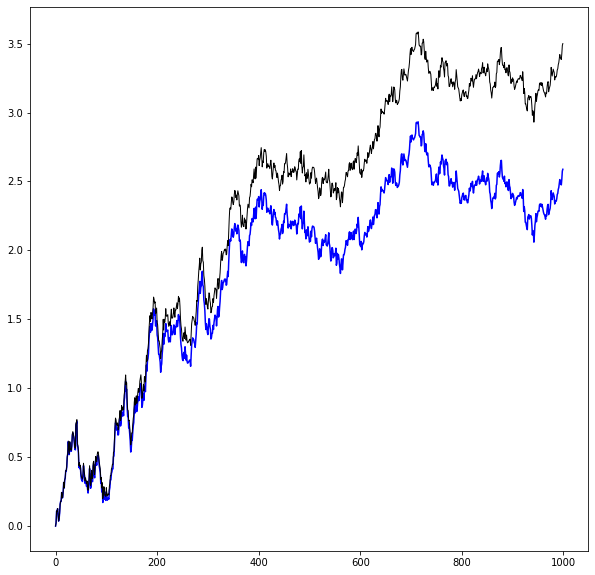

In [62]:
plt.figure(figsize=(10,10))
T=1000
states_10000 = states
plt.plot(np.array(st10000)[:,0][:T], color="blue")
plt.plot(states_10000[:,0][:T],color="black", linewidth=1)

In [63]:
periods = 2
ppp=100000
itraj = 1


states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params

symplectic = np.array([[0,1],[-1,0]])
#e = np.pi/10
#parameters = np.arange(0,4*np.pi + e,e)
parameters = [2*np.pi]

preds = {t:[] for t in range(len(parameters))}
simulated_states = {t:[[states[0], covs[0]]] for t in range(len(parameters))}


give_pred = lambda st: np.dot(C,st)*dt
xi = lambda cov,D: np.dot(cov, ct(C)) + ct(D)

def evolve_simu_state(simu_st, simu_a, simu_d, dy):
    x, cov = simu_st
    XiCov = xi(cov, simu_d)
    dx = np.dot(simu_a - np.dot(XiCov,C), x)*dt + np.dot(XiCov, dy)  #evolution update (according to what you measure)
    dcov = (np.dot(simu_a,cov) + np.dot(cov, ct(simu_a)) + simu_d - np.dot(XiCov, ct(XiCov)))*dt  #covariance update
    return [x + dx, cov + dcov]


for dy in tqdm(signals):
    for i in range(len(parameters)):
        preds[i].append(give_pred(simulated_states[i][-1][0]))
        simu_A = A
        simu_d = D#np.diag([(gamma*(n+0.5)) + Lambda]*2)
        simulated_states[i].append(evolve_simu_state(simulated_states[i][-1], A, D, dy))

states_100000 = states


100%|██████████| 200000/200000 [00:05<00:00, 35471.06it/s]


In [64]:
st100000 = [simulated_states[0][k][0]  for k in range(len(signals))]

(-14.0, 14.0)

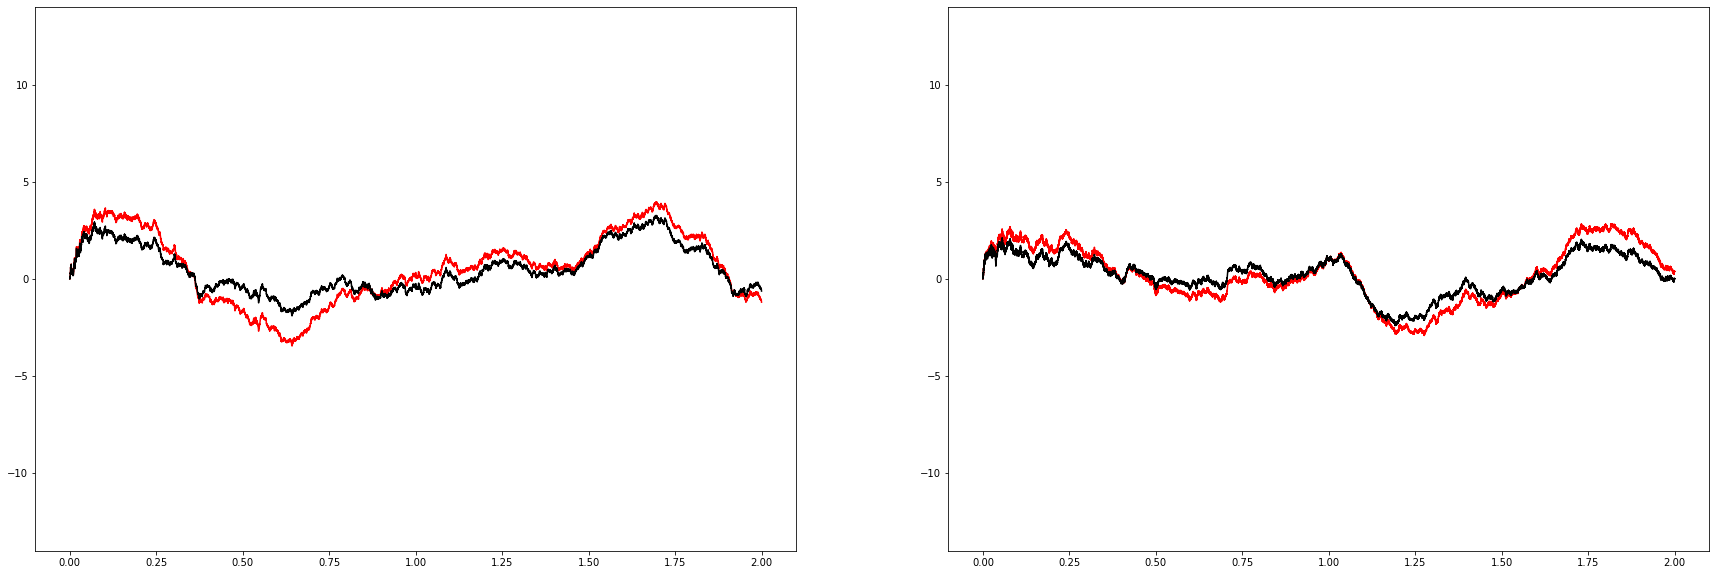

In [66]:
N=14

T = -1
plt.figure(figsize=(30,10))
plt.subplot(121)
ppp=10**4
plt.plot(np.linspace(0,2,ppp*2)[:T], states_10000[:,0][:-1][:T], label="RK 500", color="red")
plt.plot(np.linspace(0,2,ppp*2)[:T], np.array(st10000)[:,0][:T], label="Euler 500", color="black")
plt.ylim(-N,N)
plt.subplot(122)

ppp=10**5
plt.plot(np.linspace(0,2,ppp*2)[:T], states_100000[:,0][:-1][:T], label="RK 500", color="red")
plt.plot(np.linspace(0,2,ppp*2)[:T], np.array(st100000)[:,0][:T], label="Euler 500", color="black")
plt.ylim(-N,N)



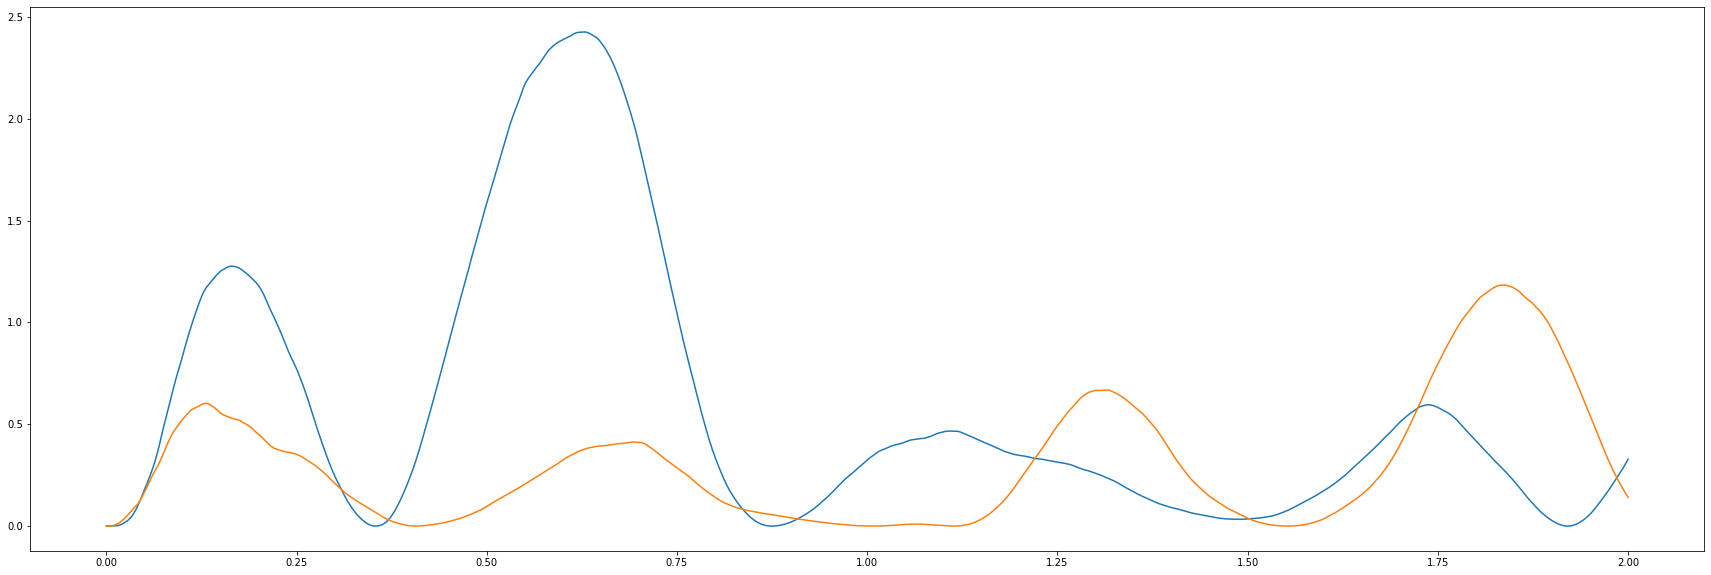

In [67]:
N=14

T = 1000
plt.figure(figsize=(30,10))
#plt.subplot(121)
ppp=10**4
plt.plot(np.linspace(0,2,ppp*2), (states_10000[:,0][:-1] - np.array(st10000)[:,0])**2         )#states_10000[:,0][:-1][:T], label="RK 500", color="red")
ppp=10**5
plt.plot(np.linspace(0,2,ppp*2), (states_100000[:,0][:-1]- np.array(st100000)[:,0])**2         )#states_10000[:,0][:-1][:T], label="RK 500", color="red")
#plt.plot(np.linspace(0,2,ppp*2)[:T], np.array(st10000)[:,0][:T], label="Euler 500", color="black")
#plt.ylim(-N,N)
#plt.subplot(122)

#plt.plot(np.linspace(0,2,ppp*2)[:T], states_100000[:,0][:-1][:T], label="RK 500", color="red")
#plt.plot(np.linspace(0,2,ppp*2)[:T], np.array(st100000)[:,0][:T], label="Euler 500", color="black")
#plt.ylim(-N,N)





In [32]:
st100 = [simulated_states[0][k][0]  for k in range(len(signals))]


In [31]:
periods = 2
ppp=100
itraj = 1


states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params

symplectic = np.array([[0,1],[-1,0]])
#e = np.pi/10
#parameters = np.arange(0,4*np.pi + e,e)
parameters = [2*np.pi]

preds = {t:[] for t in range(len(parameters))}
simulated_states = {t:[[states[0], covs[0]]] for t in range(len(parameters))}


give_pred = lambda st: np.dot(C,st)*dt
xi = lambda cov,D: np.dot(cov, ct(C)) + ct(D)

def evolve_simu_state(simu_st, simu_a, simu_d, dy):
    x, cov = simu_st
    XiCov = xi(cov, simu_d)
    dx = np.dot(simu_a - np.dot(XiCov,C), x)*dt + np.dot(XiCov, dy)  #evolution update (according to what you measure)
    dcov = (np.dot(simu_a,cov) + np.dot(cov, ct(simu_a)) + simu_d - np.dot(XiCov, ct(XiCov)))*dt  #covariance update
    return [x + dx, cov + dcov]


for dy in tqdm(signals):
    for i in range(len(parameters)):
        preds[i].append(give_pred(simulated_states[i][-1][0]))
        simu_A = A
        simu_d = D#np.diag([(gamma*(n+0.5)) + Lambda]*2)
        simulated_states[i].append(evolve_simu_state(simulated_states[i][-1], simu_a, simu_d, dy))

states_100 = states


100%|██████████| 200/200 [00:00<00:00, 16076.29it/s]


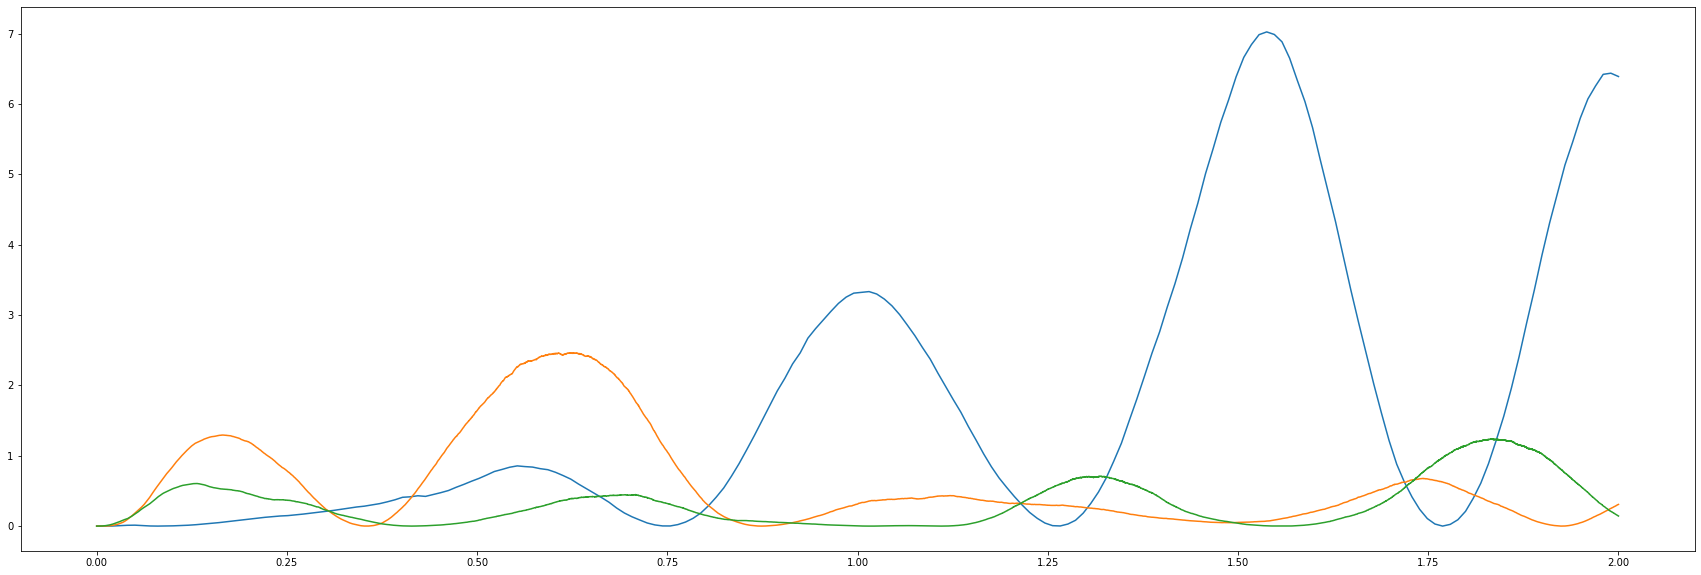

In [33]:
N=14

T = 1000
plt.figure(figsize=(30,10))
#plt.subplot(121)
ppp=10**2
plt.plot(np.linspace(0,2,ppp*2), (states_100[:,0][:-1] - np.array(st100)[:,0])**2         )#states_10000[:,0][:-1][:T], label="RK 500", color="red")
ppp=10**4
plt.plot(np.linspace(0,2,ppp*2), (states_10000[:,0][:-1] - np.array(st10000)[:,0])**2         )#states_10000[:,0][:-1][:T], label="RK 500", color="red")
ppp=10**5
plt.plot(np.linspace(0,2,ppp*2), (states_100000[:,0][:-1]- np.array(st100000)[:,0])**2         )#states_10000[:,0][:-1][:T], label="RK 500", color="red")
#plt.plot(np.linspace(0,2,ppp*2)[:T], np.array(st10000)[:,0][:T], label="Euler 500", color="black")
#plt.ylim(-N,N)
#plt.subplot(122)

#plt.plot(np.linspace(0,2,ppp*2)[:T], states_100000[:,0][:-1][:T], label="RK 500", color="red")
#plt.plot(np.linspace(0,2,ppp*2)[:T], np.array(st100000)[:,0][:T], label="Euler 500", color="black")
#plt.ylim(-N,N)





In [ ]:

plt.legend(prop={"size":20})
plt.subplot(122)
plt.plot(np.linspace(0,10,5000*10), states[:,0][:-1], label="RK 5000", color="red")
plt.plot(np.linspace(0,10,5000*10), np.array(st5000)[:,0], label="Euler 5000", color="black")
plt.ylim(-N,N)
plt.legend(prop={"size":20})

In [20]:
landscape = {}
cut_series = [int(k) for k in np.logspace(2,np.log10(len(signals)),10)]
for length_series in tqdm(cut_series):
    losses = []
    for i in range(len(parameters)):
        losses.append(np.sum(np.square(np.array(preds[i])[:length_series] - signals[:length_series]))/(2*dt*length_series))
    landscape[length_series] = losses


100%|██████████| 10/10 [00:00<00:00, 28.40it/s]


Text(0, 0.5, '$C(\\omega, \\tilde{\\omega})$')

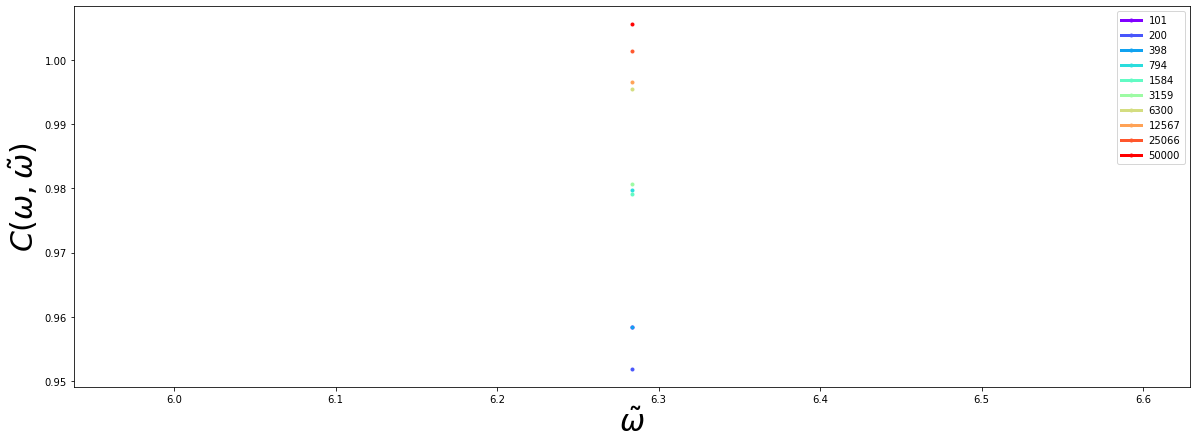

In [21]:
plt.figure(figsize=(20,7))
colors = plt.get_cmap("rainbow")
ax = plt.subplot2grid((1,1),(0,0))
for ind,p in enumerate(landscape.values()):
    plt.plot(parameters,p, color=colors(np.linspace(0,1,len(landscape)))[ind], marker='.', label="{}".format(int(np.round(cut_series[ind]+1,0))),linewidth=3)
plt.legend()
plt.xlabel(r'$\tilde{\omega}$',size=30)
plt.ylabel(r'$C(\omega, \tilde{\omega})$',size=30)

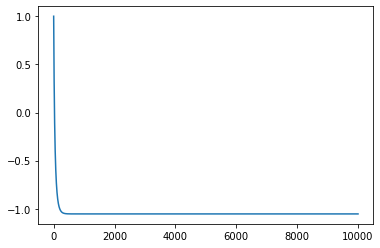

In [23]:
plt.plot(covs[:,0,0][:T])

In [42]:

periods = 10
ppp=5000
itraj = 1


states, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params



symplectic = np.array([[0,1],[-1,0]])
#e = np.pi/10
#parameters = np.arange(0,4*np.pi + e,e)
parameters = [2*np.pi]

preds = {t:[] for t in range(len(parameters))}
simulated_states = {t:[[states[0], covs[0]]] for t in range(len(parameters))}


give_pred = lambda st: np.dot(C,st)*dt
xi = lambda cov,D: np.dot(cov, ct(C)) + ct(D)

def evolve_simu_state(simu_st, simu_a, simu_d, dy):
    x, cov = simu_st
    XiCov = xi(cov, simu_d)
    dx = np.dot(simu_a - np.dot(XiCov,C), x)*dt + np.dot(XiCov, dy)  #evolution update (according to what you measure)
    dcov = (np.dot(simu_a,cov) + np.dot(cov, ct(simu_a)) + simu_d - np.dot(XiCov, ct(XiCov)))*dt  #covariance update
    return [x + dx, cov + dcov]


for dy in tqdm(signals):
    for i in range(len(parameters)):
        preds[i].append(give_pred(simulated_states[i][-1][0]))
        simu_a =  parameters[i]*symplectic + np.diag([-0.5*gamma])
        simu_d = np.diag([(gamma*(n+0.5)) + Lambda]*2)
        simulated_states[i].append(evolve_simu_state(simulated_states[i][-1], simu_a, simu_d, dy))



100%|██████████| 50000/50000 [00:04<00:00, 11128.38it/s]


In [54]:
periods = 100
ppp=500
itraj = 1

states500, covs, signals, [A,dt,C,D], params = load_data(periods=periods, ppp=ppp, itraj=itraj,method="RK4")
eta, gamma, Lambda, omega, n = params


In [43]:
st5000 = [simulated_states[0][k][0]  for k in range(len(signals))]


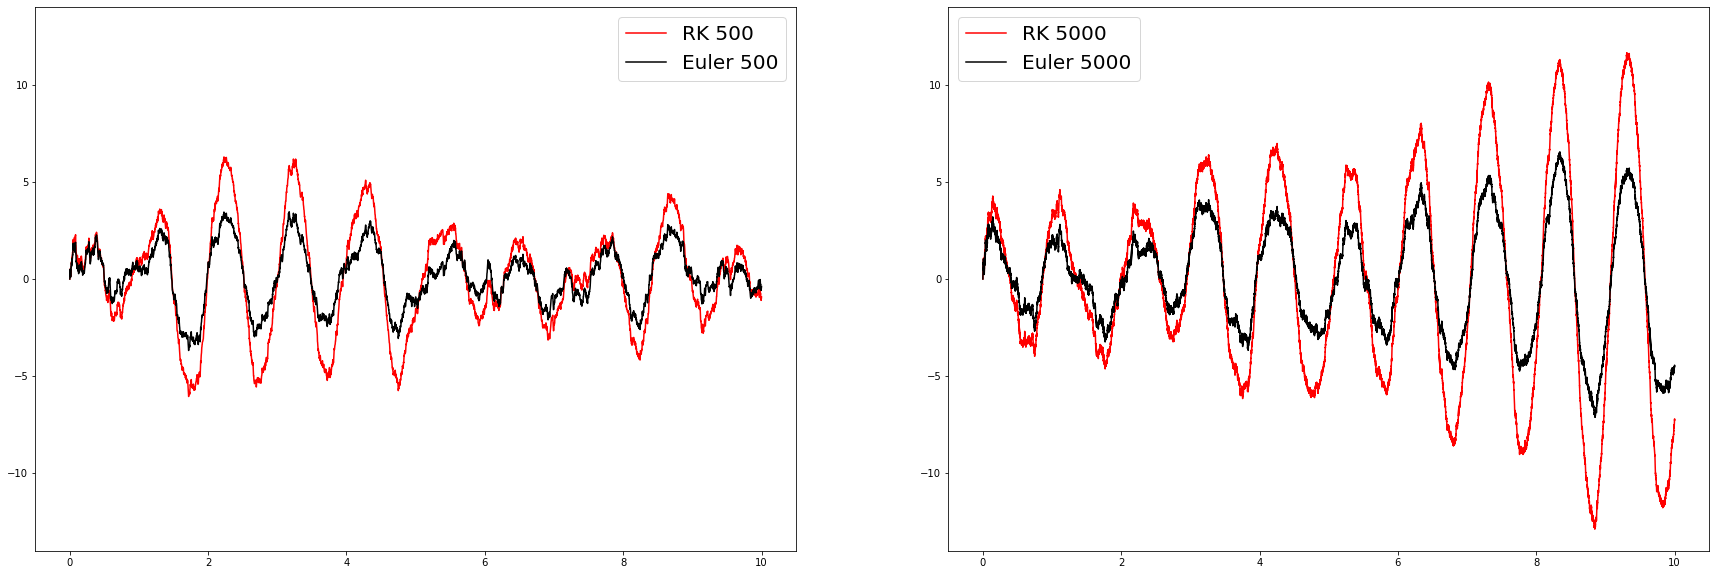

In [72]:
N=14

plt.figure(figsize=(30,10))
plt.subplot(121)
plt.plot(np.linspace(0,10,500*10), states500[:,0][:-1][:(10*500)], label="RK 500", color="red")
plt.plot(np.linspace(0,10,500*10), np.array(st500)[:,0][:(10*500)], label="Euler 500", color="black")
plt.ylim(-N,N)

plt.legend(prop={"size":20})
plt.subplot(122)
plt.plot(np.linspace(0,10,5000*10), states[:,0][:-1], label="RK 5000", color="red")
plt.plot(np.linspace(0,10,5000*10), np.array(st5000)[:,0], label="Euler 5000", color="black")
plt.ylim(-N,N)
plt.legend(prop={"size":20})

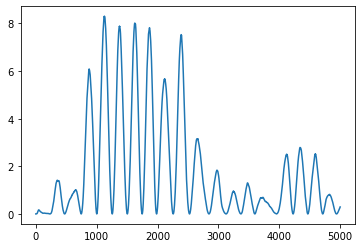

In [74]:
plt.plot((np.array(st500)[:,0][:(10*500)]  - states500[:,0][:-1][:(10*500)])**2)

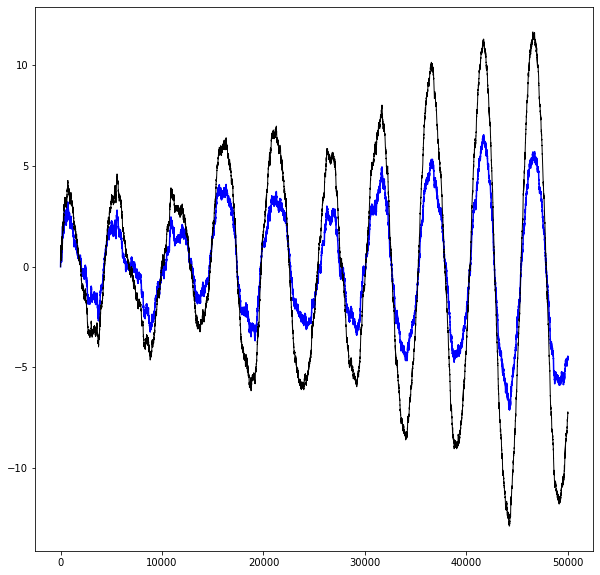

In [33]:
plt.figure(figsize=(10,10))
T=len(staas)
plt.plot(np.array(staas)[:,0][:T], color="blue")
plt.plot(states[:,0][:T],color="black", linewidth=1)

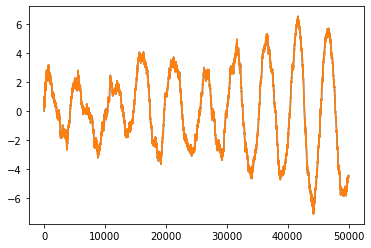

In [39]:
plt.plot(np.array(staa)[:,0])
plt.plot(np.array(staas)[:,0])

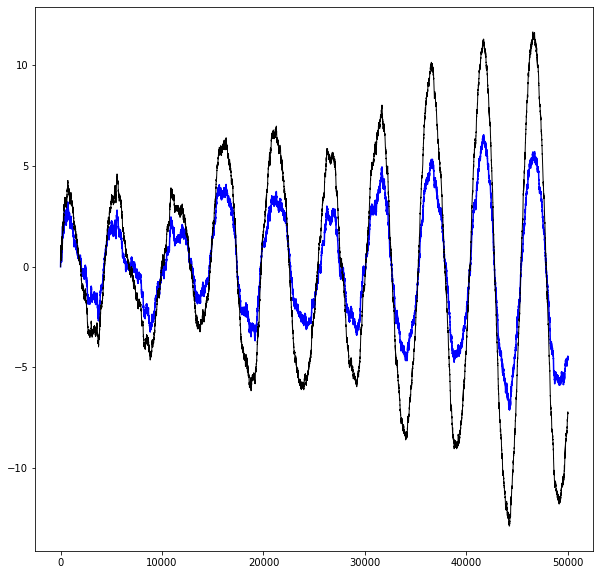

In [35]:
staa = [simulated_states[0][k][0]  for k in range(len(signals))]
plt.figure(figsize=(10,10))
T=100000
plt.plot(np.array(staa)[:,0][:T], color="blue")
plt.plot(states[:,0][:T],color="black", linewidth=1)